In [45]:
import pandas as pd
import numpy as np
import os

df_combined = pd.DataFrame()

appended_data = []

directory = 'Property_taxes_data'

for root, dirs, files in os.walk(directory):
    for file in files:
        data = pd.read_csv(directory+'/'+file)
        data = data.drop_duplicates(subset='PID')
        data['CURRENT_HOUSE_PRICE'] = data.apply(lambda x: (x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'])/1000000.0, axis = 1)
        # store DataFrame in list
        appended_data.append(data)
        
df = pd.concat(appended_data, axis=0, sort=False)

df = df[['PID','LEGAL_TYPE','PROPERTY_POSTAL_CODE','CURRENT_LAND_VALUE',\
                     'CURRENT_IMPROVEMENT_VALUE','PREVIOUS_LAND_VALUE',\
                     'PREVIOUS_IMPROVEMENT_VALUE','TAX_ASSESSMENT_YEAR','YEAR_BUILT','NEIGHBOURHOOD_CODE','CURRENT_HOUSE_PRICE']]

In [48]:
#df.to_csv("Complete_tax_2006_2019_Data.csv",index=False)

In [53]:
codes = pd.read_csv('van_neighbour_code_map.csv')

area_df = df.merge(codes, left_on='NEIGHBOURHOOD_CODE',right_on='CODE')

area_df

,PID,LEGAL_TYPE,PROPERTY_POSTAL_CODE,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,YEAR_BUILT,NEIGHBOURHOOD_CODE,CURRENT_HOUSE_PRICE,CODE,NEIGHBOURHOOD_NAME
0,018-392-164,LAND,V6C 3R2,84600.0,481000.0,NaN,NaN,2006.0,2002.0,26,0.565600,26,Downtown
1,026-581-825,STRATA,V6E 4V3,142899.0,272092.0,NaN,NaN,2006.0,2006.0,26,0.414991,26,Downtown
2,026-581-833,STRATA,V6E 4V3,115294.0,219529.0,NaN,NaN,2006.0,2006.0,26,0.334823,26,Downtown
3,026-581-841,STRATA,V6E 4V3,115294.0,219529.0,NaN,NaN,2006.0,2006.0,26,0.334823,26,Downtown
4,026-581-850,STRATA,V6E 4V3,142899.0,272092.0,NaN,NaN,2006.0,2006.0,26,0.414991,26,Downtown
5,026-581-868,STRATA,V6E 4V3,84441.0,160782.0,NaN,NaN,2006.0,2006.0,26,0.245223,26,Downtown
6,026-581-876,STRATA,V6E 4V3,84441.0,160782.0,NaN,NaN,2006.0,2006.0,26,0.245223,26,Downtown
7,026-581-884,STRATA,V6E 4V3,84441.0,160782.0,NaN,NaN,2006.0,2006.0,26,0.245223,26,Downtown
8,026-581-892,STRATA,V6E 4V3,142899.0,272092.0,NaN,NaN,2006.0,2006.0,26,0.414991,26,Downtown
9,026-581-906,STRATA,V6E 4V3,100679.0,191701.0,NaN,NaN,2006.0,2006.0,26,0.292380,26,Downtown


In [68]:
med_df =  area_df.groupby(["NEIGHBOURHOOD_NAME","TAX_ASSESSMENT_YEAR"]).CURRENT_HOUSE_PRICE.median()
med_df = med_df.reset_index()
med_df['TAX_ASSESSMENT_YEAR'] = med_df['TAX_ASSESSMENT_YEAR'].astype(int)
med_df = med_df.rename(columns={"CURRENT_HOUSE_PRICE": "CURRENT_MEDIAN_PRICE"})

postal_area_df = pd.read_csv('Vancouver_Neigbourhood_Data.csv') # Neighbourhood_Name
new_df = med_df.merge(postal_area_df, left_on='NEIGHBOURHOOD_NAME',right_on='Neighbourhood_Name')
req_df = new_df[['NEIGHBOURHOOD_NAME','Postal_Code','TAX_ASSESSMENT_YEAR','CURRENT_MEDIAN_PRICE']]

req_df.head(20)

,NEIGHBOURHOOD_NAME,Postal_Code,TAX_ASSESSMENT_YEAR,CURRENT_MEDIAN_PRICE
0,Arbutus-Ridge,V6L,2006,0.80475
1,Arbutus-Ridge,V6L,2007,1.01700
2,Arbutus-Ridge,V6L,2008,1.22905
3,Arbutus-Ridge,V6L,2009,1.23490
4,Arbutus-Ridge,V6L,2010,1.22900
5,Arbutus-Ridge,V6L,2011,1.51500
6,Arbutus-Ridge,V6L,2012,1.90910
7,Arbutus-Ridge,V6L,2013,1.82600
8,Arbutus-Ridge,V6L,2014,1.82455
9,Arbutus-Ridge,V6L,2015,1.98200


In [81]:
req_df['NEIGHBOURHOOD_NAME'].unique()

array(['Arbutus-Ridge', 'Downtown', 'Dunbar-Southlands', 'Fairview',
       'Grandview-Woodland', 'Hastings-Sunrise',
       'Kensington-Cedar Cottage', 'Kerrisdale', 'Killarney', 'Kitsilano',
       'Marpole', 'Mount Pleasant', 'Oakridge', 'Renfrew-Collingwood',
       'Riley Park', 'Shaughnessy', 'South Cambie', 'Sunset',
       'Victoria-Fraserview', 'West End', 'West Point Grey'], dtype=object)

In [86]:
combine_df_list = []

years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

for name in req_df['NEIGHBOURHOOD_NAME'].unique():
    temp_df = req_df[req_df['NEIGHBOURHOOD_NAME']==name].copy()
    prev_list = [float(temp_df[temp_df['TAX_ASSESSMENT_YEAR']==2006]['CURRENT_MEDIAN_PRICE'])]
    for year in years:
        prev_list.append(float(temp_df[temp_df['TAX_ASSESSMENT_YEAR']== year]['CURRENT_MEDIAN_PRICE']))
    temp_df['PREVIOUS_MEDIAN_PRICE'] = prev_list
    combine_df_list.append(temp_df)
    
data_prev_df = pd.concat(combine_df_list, axis=0, sort=False)
data_prev_df = data_prev_df[["NEIGHBOURHOOD_NAME","TAX_ASSESSMENT_YEAR","PREVIOUS_MEDIAN_PRICE",\
                            "Postal_Code","CURRENT_MEDIAN_PRICE"]]

data_prev_df.head(20)

,NEIGHBOURHOOD_NAME,TAX_ASSESSMENT_YEAR,PREVIOUS_MEDIAN_PRICE,Postal_Code,CURRENT_MEDIAN_PRICE
0,Arbutus-Ridge,2006,0.80475,V6L,0.80475
1,Arbutus-Ridge,2007,0.80475,V6L,1.01700
2,Arbutus-Ridge,2008,1.01700,V6L,1.22905
3,Arbutus-Ridge,2009,1.22905,V6L,1.23490
4,Arbutus-Ridge,2010,1.23490,V6L,1.22900
5,Arbutus-Ridge,2011,1.22900,V6L,1.51500
6,Arbutus-Ridge,2012,1.51500,V6L,1.90910
7,Arbutus-Ridge,2013,1.90910,V6L,1.82600
8,Arbutus-Ridge,2014,1.82600,V6L,1.82455
9,Arbutus-Ridge,2015,1.82455,V6L,1.98200


In [116]:
interst_rates = [5.8125,6.104166667,4.729166667,2.395833333,2.604166667,3,3,3,3,2.775,2.7,2.7,2.7,2.7]
years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

Can_Interest_rate_data = pd.DataFrame({"year":years,"interest_rate":interst_rates})

Can_Interest_rate_data.to_csv('Can_Interest_rate_data_2006_2019.csv',index=False)

In [118]:
merge_df = data_prev_df.merge(Can_Interest_rate_data, left_on='TAX_ASSESSMENT_YEAR',right_on='year')

merge_df = merge_df[["NEIGHBOURHOOD_NAME","TAX_ASSESSMENT_YEAR","PREVIOUS_MEDIAN_PRICE",\
                     "Postal_Code","interest_rate","CURRENT_MEDIAN_PRICE"]]
merge_df = merge_df.rename(columns={"Postal_Code": "POSTAL_AREA","interest_rate":"INTEREST_RATE"})

merge_df = merge_df.sort_values(by=["NEIGHBOURHOOD_NAME","TAX_ASSESSMENT_YEAR"])

Pearson's correlation: -0.539

Spearman's correlation: -0.434


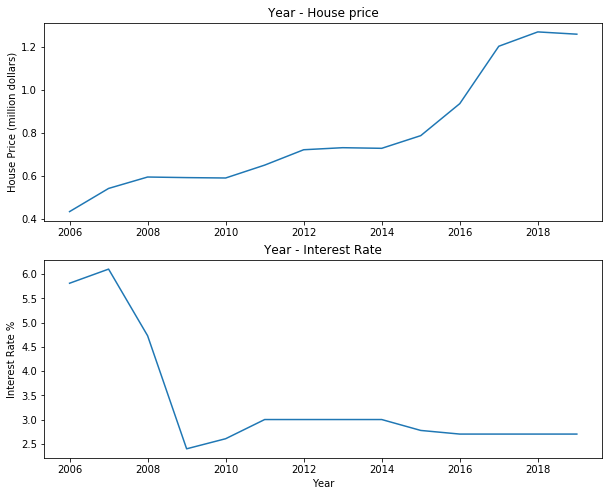

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

van_prices = df.groupby(["TAX_ASSESSMENT_YEAR"]).CURRENT_HOUSE_PRICE.median().reset_index()
van_prices = van_prices.rename(columns={"CURRENT_HOUSE_PRICE": "CURRENT_MEDIAN_PRICE"})

van_prices["TAX_ASSESSMENT_YEAR"] = van_prices["TAX_ASSESSMENT_YEAR"].astype(int)
prices_interest = van_prices.merge(Can_Interest_rate_data,left_on='TAX_ASSESSMENT_YEAR',right_on='year')

fig , ax = plt.subplots(2,1, figsize=(10,8))

ax[0].plot(prices_interest['year'], prices_interest['CURRENT_MEDIAN_PRICE'])
ax[0].set_title('Year - House price')
ax[0].set_ylabel('House Price (million dollars)')

ax[1].plot(prices_interest['year'], prices_interest['interest_rate'])
ax[1].set_title('Year - Interest Rate')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Interest Rate %')

def get_corr(df,corr_method): 
    return df['CURRENT_MEDIAN_PRICE'].corr(df['interest_rate'],method = corr_method)

print("Pearson's correlation: %.3f\n" % get_corr(prices_interest,"pearson"))
print("Spearman's correlation: %.3f" % get_corr(prices_interest,"spearman"))

## Data and Modelling Time Series using Regression

In [213]:
model_data = merge_df.drop('POSTAL_AREA',axis=1)

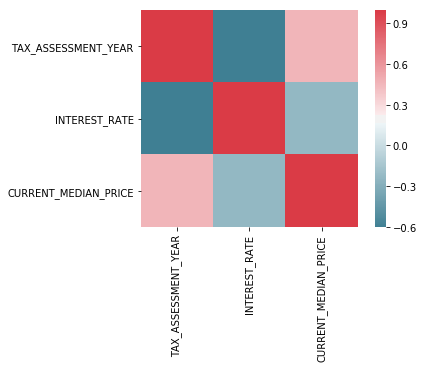

In [214]:
model_data = model_data[model_data['TAX_ASSESSMENT_YEAR']!=2006]

no_prev_data = model_data.drop('PREVIOUS_MEDIAN_PRICE',axis=1)

import seaborn as sns

corr = no_prev_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

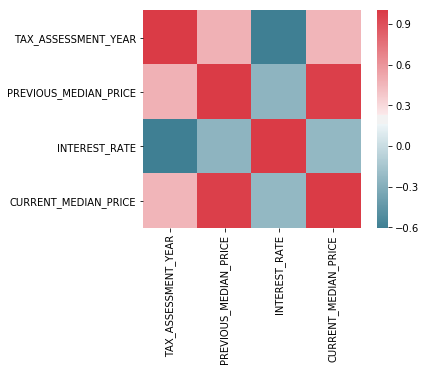

In [215]:
import seaborn as sns

corr = model_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

In [216]:
model_data.to_csv('Neighbourhood_model_data.csv',index=False)
model_data.head(30)

,NEIGHBOURHOOD_NAME,TAX_ASSESSMENT_YEAR,PREVIOUS_MEDIAN_PRICE,INTEREST_RATE,CURRENT_MEDIAN_PRICE
21,Arbutus-Ridge,2007,0.80475,6.104167,1.01700
42,Arbutus-Ridge,2008,1.01700,4.729167,1.22905
63,Arbutus-Ridge,2009,1.22905,2.395833,1.23490
84,Arbutus-Ridge,2010,1.23490,2.604167,1.22900
105,Arbutus-Ridge,2011,1.22900,3.000000,1.51500
126,Arbutus-Ridge,2012,1.51500,3.000000,1.90910
147,Arbutus-Ridge,2013,1.90910,3.000000,1.82600
168,Arbutus-Ridge,2014,1.82600,3.000000,1.82455
189,Arbutus-Ridge,2015,1.82455,2.775000,1.98200
210,Arbutus-Ridge,2016,1.98200,2.700000,2.36600


In [217]:
from sklearn.metrics import mean_squared_error
from math import sqrt # rms = sqrt(mean_squared_error(y_true, y_predicted))
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# linear regression models

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet,BayesianRidge
from sklearn.svm import SVR

# cross val, k-folds
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline

In [218]:
dum_df = pd.get_dummies(model_data)

y  = dum_df["CURRENT_MEDIAN_PRICE"]

dum_df["PREVIOUS_MEDIAN_PRICE"] = dum_df["PREVIOUS_MEDIAN_PRICE"]

X = dum_df.drop('CURRENT_MEDIAN_PRICE',axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=23)

gbr_model = GradientBoostingRegressor()

gbr_model.fit(X_train,y_train)

y_pred = gbr_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred)) 
r2 = r2_score(y_test, y_pred)

print("Gradient Boost(No tuning) Regression Scores- rmse:",rmse," r2:",r2)

Gradient Boost(No tuning) Regression Scores- rmse: 0.09484618605909076  r2: 0.9837509887027562


In [219]:
# save and load model
import pickle
# now you can save it to a file
with open('GBR.pkl', 'wb') as f:
    pickle.dump(gbr_model, f)

# and later you can load it
with open('GBR.pkl', 'rb') as f:
    gbr_model = pickle.load(f)

## Sample Input

In [220]:
Area = 'Fairview'

year = 2020

nbrhd = model_data[(model_data["NEIGHBOURHOOD_NAME"]==Area)]# & model_data["TAX_ASSESSMENT_YEAR"]==2019]  
prev_price = nbrhd[nbrhd['TAX_ASSESSMENT_YEAR']==year-1]['CURRENT_MEDIAN_PRICE']

interest_rate_2020 = 3.5

sample_data = pd.DataFrame({"NEIGHBOURHOOD_NAME":Area,"TAX_ASSESSMENT_YEAR":year,"PREVIOUS_MEDIAN_PRICE":\
                           prev_price,"INTEREST_RATE":interest_rate_2020})

indexed = pd.get_dummies(sample_data)

req_cols = set(model_data['NEIGHBOURHOOD_NAME'].unique())-(set({Area}))

for col in req_cols:
    indexed["NEIGHBOURHOOD_NAME_"+col]=0
    
#Added this - check
indexed["NEIGHBOURHOOD_NAME_"+Area]=1
    
predicted_price = gbr_model.predict(indexed)[0]

print("Inputs:\n")

print(sample_data.iloc[0,:])

print("\nPredicted Current Price",predicted_price)

Inputs:

NEIGHBOURHOOD_NAME       Fairview
TAX_ASSESSMENT_YEAR          2020
PREVIOUS_MEDIAN_PRICE       0.798
INTEREST_RATE                 3.5
Name: 276, dtype: object

Predicted Current Price 0.8997212682104695


In [1]:
interest_rate_2020 = 3.5

In [2]:
type(interest_rate_2020)

float